
#### [**과제 내용**]
<BR>
20개 이상의 키(x)에 따른 몸무게(y) 데이터를 바탕으로 선형회귀 모델을 구현하고, 결과를 분석

1. 데이터는 개별적으로 생성

2. 손실 함수는 MSE loss를 사용 ( torch.nn.MSELoss() )

3. 최적화 방법은 Stochastic Gradient Descent 를 사용

In [1]:
# 넘파이와 파이토치 불러오기
import numpy as np
import torch

# Neural Network의 약자로 인공신경망 연산들이 들어가 있음
import torch.nn as nn
# 모델을 최적화하는데 필요한 최적화 함수
import torch.optim as optim
# 텐서를 초기화 하는 함수들이 들어가 있음
import torch.nn.init as init
# 데이터나 학습 결과를 출력하기 위해 사용
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd
data = pd.read_csv("weight-height.csv")
data = data.drop('Gender', axis=1)[:100]
data.head(10)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971110
8,67.018950,175.929440
9,63.456494,156.399676


In [12]:
x = data['Height'].values
y = data['Weight'].values
# x의 이상치를 제거
Q1_x = np.percentile(x, 25)
Q3_x = np.percentile(x, 75)
IQR_x = Q3_x - Q1_x
filter_x = ((x >= Q1_x - 1.5 * IQR_x) & (x <= Q3_x + 1.5 * IQR_x))

# y의 이상치를 제거
Q1_y = np.percentile(y, 25)
Q3_y = np.percentile(y, 75)
IQR_y = Q3_y - Q1_y
filter_y = ((y >= Q1_y - 1.5 * IQR_y) & (y <= Q3_y + 1.5 * IQR_y))

# 최종 필터링
final_filter = filter_x & filter_y

x_filtered = x[final_filter]
y_filtered = y[final_filter]

In [6]:
x_filtered

array([68.78190405, 74.11010539, 71.7309784 , 69.88179586, 67.25301569,
       68.78508125, 68.34851551, 67.01894966, 63.45649398, 71.19538228,
       71.64080512, 64.76632913, 69.2830701 , 69.24373223, 67.6456197 ,
       72.41831663, 63.97432572, 69.6400599 , 67.93600485, 67.91505019])

In [13]:
x = torch.from_numpy(x_filtered).float().unsqueeze(1)
y = torch.from_numpy(y_filtered).float().unsqueeze(1)

num_epoch = 10000
num_data = len(data)

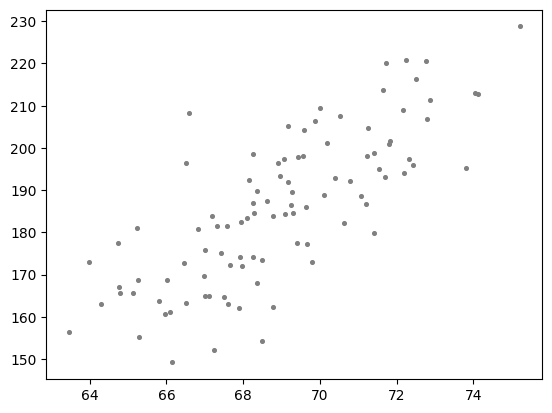

In [14]:
# 데이터 시각화
plt.scatter(x.numpy(), y.numpy(), s=7, c='gray')

In [19]:
# 모델 정의
model = nn.Linear(1,1)

loss_func = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.0001)


In [ ]:
loss_arr=[]

for i in range(num_epoch):
  optimizer.zero_grad()

  output = model(x)

  loss = loss_func(output, y)

  loss.backward()

  optimizer.step()

  loss_arr.append(loss.item())

  if (i+1) % 5 == 0:
    print(f"Epoch [{i+1}/{num_epoch}], Loss: {loss.item():.4f}")



In [26]:
loss_arr[-1]

927.16796875

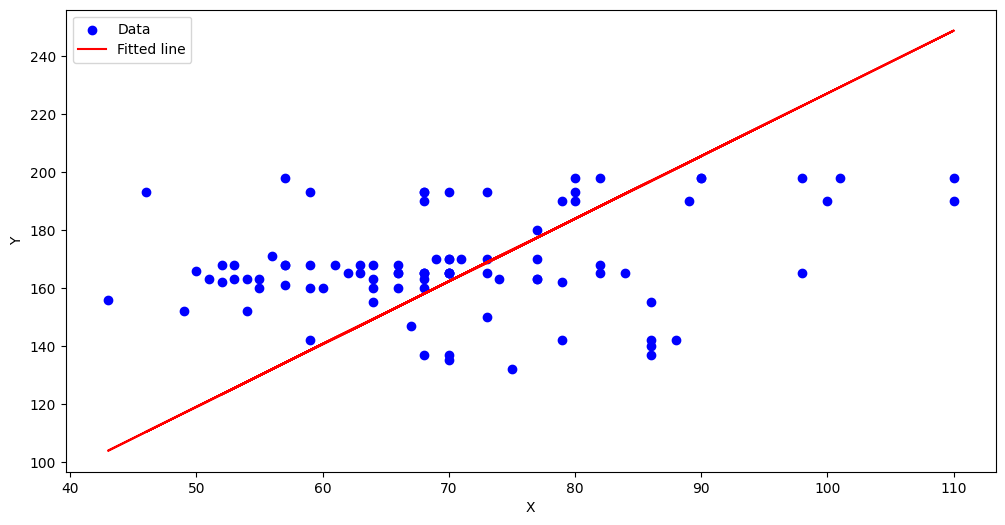

In [21]:
# 결과 시각화
plt.figure(figsize=(12, 6))
plt.scatter(x.numpy(), y.numpy(), label="Data", color="blue")
plt.plot(x.numpy(), output.detach().numpy(), label="Fitted line", color="red")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

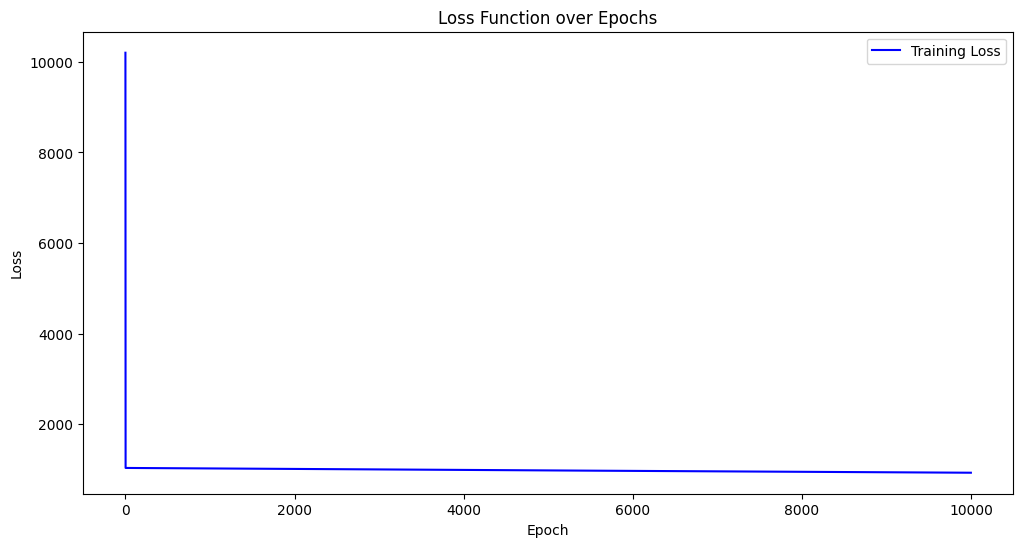

In [28]:
# loss function 시각화
plt.figure(figsize=(12, 6))
plt.plot(loss_arr, label="Training Loss", color="blue")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Function over Epochs")
plt.legend()
plt.show()


In [23]:
# 최종 가중치 값 확인하기
param_list = list(model.parameters())
print("Weight:", param_list[0].item(), "\nBias: ", param_list[1].item())

Weight: 2.162531614303589 
Bias:  10.870275497436523
